## The Data

Context

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

Columns
* age  age in years
* sex  (1 = male; 0 = female)
* cp  chest pain type
* trestbps   resting blood pressure (in mm Hg on admission to the hospital)
* cholserum   cholestoral in mg/dl
* fbs (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg   resting electrocardiographic results
* thalach   maximum heart rate achieved
* exang    exercise induced angina (1 = yes; 0 = no)
* oldpeak   ST depression induced by exercise relative to rest
* slope    the slope of the peak exercise ST segment
* ca    number of major vessels (0-3) colored by flourosopy
* thal3 = normal; 6 = fixed defect; 7 = reversable defect
* target   1 or 0

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.shape

(303, 14)

In [6]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,293,294,295,296,297,298,299,300,301,302
age,63.0,37.0,41.0,56.0,57.0,57.0,56.0,44.0,52.0,57.0,...,67.0,44.0,63.0,63.0,59.0,57.0,45.0,68.0,57.0,57.0
sex,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
cp,3.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0,...,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0
trestbps,145.0,130.0,130.0,120.0,120.0,140.0,140.0,120.0,172.0,150.0,...,152.0,120.0,140.0,124.0,164.0,140.0,110.0,144.0,130.0,130.0
chol,233.0,250.0,204.0,236.0,354.0,192.0,294.0,263.0,199.0,168.0,...,212.0,169.0,187.0,197.0,176.0,241.0,264.0,193.0,131.0,236.0
fbs,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
restecg,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
thalach,150.0,187.0,172.0,178.0,163.0,148.0,153.0,173.0,162.0,174.0,...,150.0,144.0,144.0,136.0,90.0,123.0,132.0,141.0,115.0,174.0
exang,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
oldpeak,2.3,3.5,1.4,0.8,0.6,0.4,1.3,0.0,0.5,1.6,...,0.8,2.8,4.0,0.0,1.0,0.2,1.2,3.4,1.2,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot:xlabel='target', ylabel='count'>

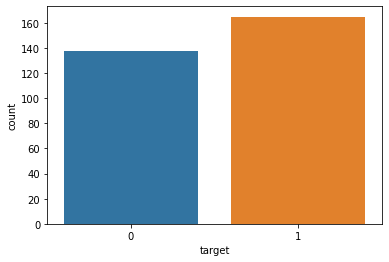

In [9]:
sns.countplot(x='target', data=df)

<AxesSubplot:xlabel='age'>

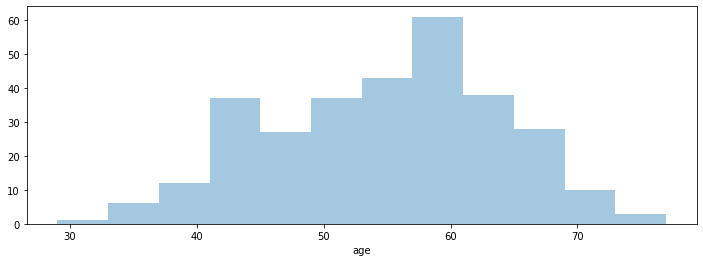

In [12]:
plt.figure(figsize=(12,4))
sns.distplot(df['age'],kde=False)

In [17]:
df.corr()['target']

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
target      1.000000
Name: target, dtype: float64

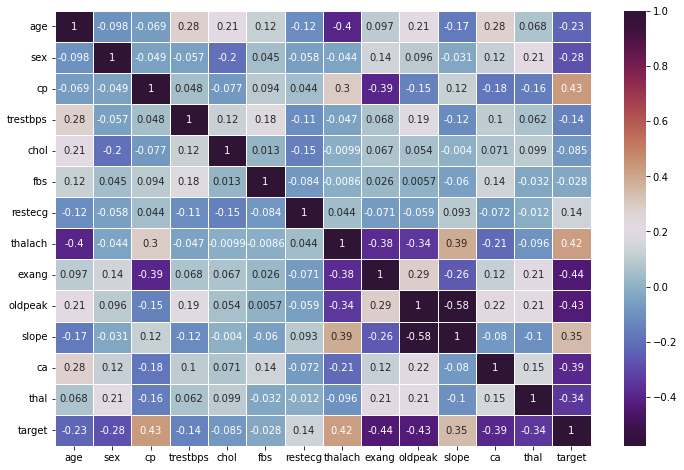

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df.corr(), annot=True, cmap='twilight_shifted', linewidths=.5);

<AxesSubplot:xlabel='chol', ylabel='thalach'>

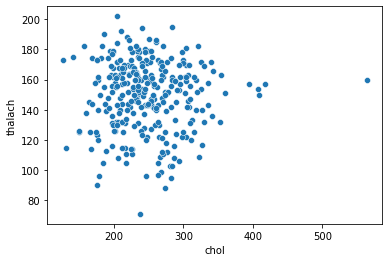

In [30]:
sns.scatterplot(data=df, x='chol', y='thalach')

<AxesSubplot:xlabel='target', ylabel='thalach'>

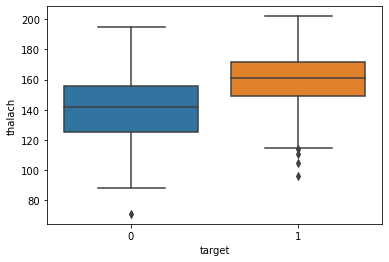

In [34]:
sns.boxplot(data=df, x='target', y='thalach')

In [37]:
df.groupby('target')['chol'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,138.0,251.086957,49.454614,131.0,217.25,249.0,283.0,409.0
1,165.0,242.230303,53.552872,126.0,208.00,234.0,267.0,564.0


In [39]:
df['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

<AxesSubplot:>

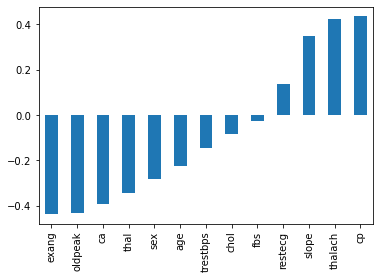

In [40]:
df.corr()['target'].sort_values().drop('target').plot(kind='bar')

In [41]:
len(df)

303

In [42]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:xlabel='cp', ylabel='count'>

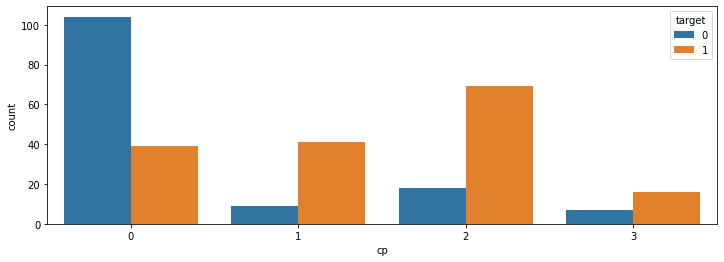

In [43]:
plt.figure(figsize=(12,4))
sns.countplot(data=df, x='cp', hue='target')

<AxesSubplot:xlabel='ca'>

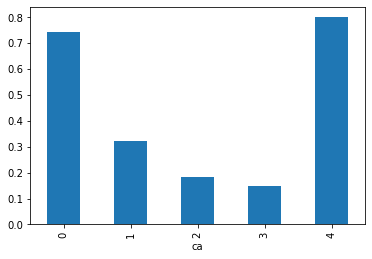

In [47]:
ca_1 = df[df['target']==1].groupby('ca').count()['target']
ca = df.groupby('ca').count()['target']
final = ca_1 / ca
final.plot(kind='bar')

In [48]:
df.select_dtypes(['object']).columns

Index([], dtype='object')

In [54]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X = df.drop('target', axis=1).values
y = df['target'].values

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
scaler = MinMaxScaler()

In [67]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
X_test.shape

(61, 13)

In [69]:
y_test.shape

(61,)

In [70]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [88]:
model = Sequential()

model.add(Dense(112, activation='relu'))
model.add(Dense(56, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(28, activation='relu'))
model.add(Dense(14, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [89]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=30,
          batch_size=128,
          validation_data=(X_test, y_test), 
          )

Epoch 1/30
2/2 [==============================] - 0s 101ms/step - loss: 0.7017 - val_loss: 0.6757
Epoch 2/30
2/2 [==============================] - 0s 22ms/step - loss: 0.6887 - val_loss: 0.6626
Epoch 3/30
2/2 [==============================] - 0s 23ms/step - loss: 0.6718 - val_loss: 0.6499
Epoch 4/30
2/2 [==============================] - 0s 21ms/step - loss: 0.6537 - val_loss: 0.6380
Epoch 5/30
2/2 [==============================] - 0s 23ms/step - loss: 0.6383 - val_loss: 0.6259
Epoch 6/30
2/2 [==============================] - 0s 22ms/step - loss: 0.6315 - val_loss: 0.6128
Epoch 7/30
2/2 [==============================] - 0s 23ms/step - loss: 0.6246 - val_loss: 0.5987
Epoch 8/30
2/2 [==============================] - 0s 22ms/step - loss: 0.6041 - val_loss: 0.5843
Epoch 9/30
2/2 [==============================] - 0s 22ms/step - loss: 0.5912 - val_loss: 0.5708
Epoch 10/30
2/2 [==============================] - 0s 22ms/step - loss: 0.5826 - val_loss: 0.5575
Epoch 11/30
2/2 [===========

In [90]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

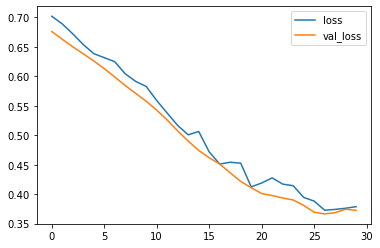

In [91]:
losses[['loss','val_loss']].plot()

In [92]:
from sklearn.metrics import classification_report,confusion_matrix

In [100]:
predictions = model.predict(X_test)

In [101]:
preds = np.argmax(predictions, axis=1)

In [103]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.51      1.00      0.67        31
           1       0.00      0.00      0.00        30

    accuracy                           0.51        61
   macro avg       0.25      0.50      0.34        61
weighted avg       0.26      0.51      0.34        61



C:\Users\Masadsrvic\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Masadsrvic\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Masadsrvic\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [107]:
confusion_matrix(y_test,preds)

array([[31,  0],
       [30,  0]], dtype=int64)